# King County House Prices Predictions

## Background
In the world of real estate, homeowners often find themselves in a difficult dilemma: trying to understand the intricate web of factors that influence the price of their most cherished possession—their homes. In the world of real estate, homeowners often struggle to understand what makes their homes valuable. Imagine you're a homeowner. Your home is one of your most precious assets. But have you ever wondered why some homes are more expensive than others? It's a bit like a puzzle. Our project is all about solving this puzzle. We are embarking on a journey to empower homeowners with a deep understanding of the determinants of house prices through our project. This project is a collaborative effort with our stakeholder, a prominent real estate agency dedicated to guiding homeowners through the intricate process of buying and selling homes.

## Business Understanding
In the dynamic real estate market of King County, Washington, numerous households aspire to purchase homes. However, the ever-present information asymmetry often leaves these potential buyers navigating the market blindly. To address this prevalent challenge, our project undertakes an in-depth analysis of house sales data spanning the years 2014 to 2015 within King County. Our mission is to offer invaluable consultation services to a reputable real estate agency dedicated to assisting households in their pursuit of homeownership.

Through a comprehensive examination of this dataset, we aim to bridge the information gap in the real estate market. Our objective is to provide a robust method for predicting house prices, enabling prospective buyers to make well-informed decisions about their property investments. In doing so, we empower both homebuyers and the real estate agency with the knowledge and insights needed to navigate the competitive King County housing landscape effectively.

### Challenges
- For homeowners, the challenge is understanding why their homes are worth a certain amount. This knowledge can help them decide if they should sell, renovate, or just enjoy their home as it is.
- The real estate agency faces a challenge too, which is to give homeowners the best advice. To do that, they need to know what makes a home valuable and to provide precise advice, they need to understand what drives property prices.

### Solutions
- Our project's solution is rooted in the power of data analysis. We will embark on a comprehensive exploration of house prices and their underlying determinants. Our aim is to not only identify the fundamental factors that sway home prices but to quantify their influence. In doing so, we seek to provide homeowners with invaluable insights.
- By uncovering the complexities of the property pricing landscape, we aim to enhance the services offered by the real estate agency. Our project is designed to be a beacon of clarity amid the maze of the real estate market.

### Conclusion
This project reflects our collective pursuit to empower homeowners with data-driven insights into their property's value and to unravel the intricate and compelling aspects of house pricing. It is our commitment to provide homeowners, buyers, and our partner agency with a crystal-clear perspective on the determinants of property value, culminating in a predictive model of unwavering accuracy.

### Problem Statement
In the dynamic real estate market of King County, Washington, prospective homebuyers often face challenges when attempting to understand the multifaceted factors that determine the prices of residential properties. This information gap can leave homeowners and potential buyers navigating the housing market without clear insights into the key determinants of property values. As a result, individuals struggle to make informed decisions when buying, selling, or investing in homes.

### Objectives
Our general objective is to investigate the effect of independent variables on the price of a house.

The Specific Objectives are :
1.  To Assess Correlations Between Independent Variables and House Prices.
2.	To Investigate the Impact of Highly and Lowly Correlated Variables on House Prices.
3.	To Develop a Robust Multilinear Regression Model for House Price Prediction.


## Preliminaries

We are going to start by importing all the necessary modules to the file

In [1]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

A separate section with all the functions will be created here as well. This was deemed as the best/most convenient approach.

In [2]:
def read_file_to_dataframe(file):
    """
    Reads a file and returns its contents as a pandas DataFrame.

    Parameters:
    - file (str): The path to the file to be read.

    Returns:
    - df (pandas.DataFrame): The contents of the file as a DataFrame.

    Raises:
    - None

    Examples:
    >>> read_file_to_dataframe('data.csv')
         col1   col2
    0   value1  value2
    1   value3  value4
    """
    extension = file.split(".")[-1]
    if extension == "csv":
        df = pd.read_csv(file)
    elif extension == "xlsx" or extension == "xls":
        df = pd.read_excel(file)
    elif extension == "json":
        df = pd.read_json(file)
    elif extension == "parquet":
        df = pd.read_parquet(file)
    elif extension == "tsv" or extension == "txt":
        df = pd.read_csv(file, sep="\t")
    elif extension == 'pkl':
        df = pd.read_pickle(file)
    else:
        print("File format not supported")
        return
    return df

def dataframe_detailed(df):
    """
    Print details of the dataframe.

    Parameters:
        df (DataFrame): The dataframe to be analyzed.

    Returns:
        None
    """
    print(f"DATAFRAME SHAPE: {df.shape}\n\n")
    print(f"{df.info()}\n\n")
    print(f"DATAFRAME HEAD:\n {df.head()}\n\n")
    print(f"DATAFRAME KEY STATISTIC DESCRIPTION:\n {df.describe()}\n\n")

def map_replace_values(df, column, replacement_dict):
    """
    Replace values in a DataFrame column using a dictionary mapping.

    :param df: The DataFrame to modify.
    :type df: pandas.DataFrame
    :param column: The name of the column to replace values in.
    :type column: str
    :param replacement_dict: A dictionary mapping old values to new values.
    :type replacement_dict: dict
    :return: The modified DataFrame with replaced values.
    :rtype: pandas.DataFrame
    """
    df[column] = df[column].map(replacement_dict)
    return df

def fit_simple_linear_regression(df, dependent_variable, independent_variable):
    """
    Fits a simple linear regression model to the given dataframe.

    :param df: The pandas dataframe containing the data.
    :param dependent_variable: The name of the dependent variable column.
    :param independent_variable: The name of the independent variable column.

    :return: A tuple containing the root mean squared error (rmse),
      the mean absolute error (mae), and the model summary.
    """

    # Create and fit the simple linear regression model
    y = df[dependent_variable]
    X = df[independent_variable]
    X = sm.add_constant(X)  # Add a constant for the intercept
    model = sm.OLS(y, X).fit()

    # Calculate RMSE and MAE
    predictions = model.predict(X)
    residuals = y - predictions
    rmse = np.sqrt(np.mean(residuals**2))
    mae = np.mean(np.abs(residuals))

    # Get the model summary
    model_summary = model.summary()

    return rmse, mae, model_summary

def fit_linear_regression(df, dependent_variable, independent_variables):
    """
    Fit a linear regression model to the given data.

    Args:
        df (pandas.DataFrame): The input dataframe containing the data.
        dependent_variable (str): The name of the dependent variable.
        independent_variables (list): The list of independent variables.

    Returns:
        tuple: A tuple containing the fitted model and its summary.

    Raises:
        None

    Example:
        >>> df = pd.DataFrame({'x': [1, 2, 3], 'y': [2, 4, 6]})
        >>> fit_linear_regression(df, 'y', ['x'])
        (model, model_summary)
    """
    if len(independent_variables) == 1:
        # Simple Linear Regression
        model_formula = f"{dependent_variable} ~ {independent_variables[0]}"
        model = ols(model_formula, data=df).fit()
    else:
        # Multiple Linear Regression
        X = df[independent_variables]
        X = sm.add_constant(X)  # Add a constant for the intercept
        y = df[dependent_variable]
        model = sm.OLS(y, X).fit()

    model_summary = model.summary()

    return model, model_summary

def model_metrics(df, dependent_variable, independent_variables):
    """
    Calculate the root mean squared error (RMSE) and mean absolute error (MAE) for a linear regression model.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame containing the data.
    - dependent_variable (str): The name of the dependent variable column in the DataFrame.
    - independent_variables (list): A list of names of the independent variable columns in the DataFrame.

    Returns:
    - rmse (float): The root mean squared error.
    - mae (float): The mean absolute error.
    """
    # Create and fit the linear regression model
    X = df[independent_variables]
    X = sm.add_constant(X)  # Add a constant for the intercept
    y = df[dependent_variable]
    model = sm.OLS(y, X).fit()

    # Calculate RMSE
    y_pred = model.predict(X)
    rmse = (mean_squared_error(y, y_pred)) ** 0.5

    # Calculate MAE
    mae = mean_absolute_error(y, y_pred)

    return rmse, mae

def plot_residuals_ols_mlr(ols_model, mlr_model, X_ols, X_mlr, y):
    """
    Generate plots of residuals for OLS and MLR models.

    Parameters:
    ols_model (object): The OLS model object.
    mlr_model (object): The MLR model object.
    X_ols (array-like): The input data for the OLS model.
    X_mlr (array-like): The input data for the MLR model.
    y (array-like): The target variable.

    Returns:
    None
    """
    # Calculate residuals for OLS and MLR models
    residuals_ols = y - ols_model.predict(sm.add_constant(X_ols))
    residuals_mlr = y - mlr_model.predict(sm.add_constant(X_mlr))

    # Create a scatter plot of residuals vs. predicted values for OLS
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(ols_model.predict(sm.add_constant(X_ols)),
                residuals_ols, alpha=0.5)
    plt.title("OLS Residuals vs. Predicted Values")
    plt.xlabel("Predicted Values (OLS)")
    plt.ylabel("Residuals (OLS)")
    plt.axhline(y=0, color='r', linestyle='--')

    # Create a scatter plot of residuals vs. predicted values for MLR
    plt.subplot(1, 2, 2)
    plt.scatter(mlr_model.predict(sm.add_constant(X_mlr)),
                residuals_mlr, alpha=0.5)
    plt.title("MLR Residuals vs. Predicted Values")
    plt.xlabel("Predicted Values (MLR)")
    plt.ylabel("Residuals (MLR)")
    plt.axhline(y=0, color='r', linestyle='--')

    # Create a histogram of residuals for OLS
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(residuals_ols, bins=30, alpha=0.75)
    plt.title("Histogram of OLS Residuals")
    plt.xlabel("Residuals (OLS)")
    plt.ylabel("Frequency")

    # Create a histogram of residuals for MLR
    plt.subplot(1, 2, 2)
    plt.hist(residuals_mlr, bins=30, alpha=0.75)
    plt.title("Histogram of MLR Residuals")
    plt.xlabel("Residuals (MLR)")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

def calculate_rmse_mae_multi(model, X, y):
    """
    Calculate RMSE and MAE for a multiple linear regression model.

    Args:
    model: The fitted multiple linear regression model.
    X: The feature matrix.
    y: The true target values.

    Returns:
    rmse (float): Root Mean Squared Error.
    mae (float): Mean Absolute Error.
    """
    # Predict the target values using the model
    y_pred = model.predict(X)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Calculate MAE
    mae = mean_absolute_error(y, y_pred)

    return rmse, mae

def calculate_vif(df, target_variable):
    """
    Calculate the Variance Inflation Factor (VIF) for each independent variable in a dataframe.

    Parameters:
        df (DataFrame): The input dataframe containing the independent variables.
        target_variable (str): The name of the target variable.

    Returns:
        vif_data (DataFrame): A dataframe containing the variables and their corresponding VIF values.
    """
    # Separate the target variable
    independent_vars = df.drop(columns=[target_variable])

    vif_data = pd.DataFrame()
    vif_data["Variable"] = independent_vars.columns
    vif_data["VIF"] = [variance_inflation_factor(
        independent_vars.values, i) for i in range(independent_vars.shape[1])]

    # Handle cases with high VIF values (you can choose a threshold) by setting VIF to NaN
    threshold = 5  # You can adjust this threshold based on your analysis
    vif_data.loc[vif_data["VIF"] > threshold, "VIF"] = np.nan

    return vif_data

## Data Understanding

In this section, the identifcation, collection, and surface-level analysis of the data shall be done by:
- Collecting initial data (Has been compiled into a csv file).
- Describing the data we are working with.
- Exploring the data for any relationships and trends.
- Verifying the data quality.

In [3]:
raw_df = read_file_to_dataframe('data/kc_house_data.csv')

We will not examine the properties of the dataframe by calling the custom function `dataframe_detailed`.

In [4]:
dataframe_detailed(raw_df)

DATAFRAME SHAPE: (21597, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            2159

However, when finding out more information about the dataframe, it was noted that not all columns have the same non-null values. Thus, we will establish exactly how many null values are in each column.

In [5]:
raw_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We will also take the time to establish whether there are any duplicate values in the dataframe. As there are multiple columns with numerical data, duplicates in those columns can be expected. However, when looking at unique columns e.g. the id, duplicates should ideally not be found.

Despite this, duplicate IDs will be kept in the dataframe as the assumption is that these are people who are flipping houses, and the ID is not assigned to a particular transaction, but to a particular house.

## Data Preparation

The preparation of the final dataset is done by:
- Removal of erroneous data.
- Handling of duplicate data, and 
- Removal of null data.


The process is initiated by dropping certain columns that are deemed unnecessary. These columns are: `date` and `yr_renovated`. This is not to say that other columns may not be dropped later, but this step simply eliminates all columns that are deemed surplus to requirements.

In [6]:
df_cleaned = raw_df.drop(['date',"yr_renovated"],axis=1)
df_cleaned

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


When delving deeper into the results of `df_cleaned.info()`, it is noted that there are columns that contain null values. Thus, any record with a null value in any column shall be dropped.

In [7]:
df_cleaned.dropna(inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19164 entries, 1 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19164 non-null  int64  
 1   price          19164 non-null  float64
 2   bedrooms       19164 non-null  int64  
 3   bathrooms      19164 non-null  float64
 4   sqft_living    19164 non-null  int64  
 5   sqft_lot       19164 non-null  int64  
 6   floors         19164 non-null  float64
 7   waterfront     19164 non-null  object 
 8   view           19164 non-null  object 
 9   condition      19164 non-null  object 
 10  grade          19164 non-null  object 
 11  sqft_above     19164 non-null  int64  
 12  sqft_basement  19164 non-null  object 
 13  yr_built       19164 non-null  int64  
 14  zipcode        19164 non-null  int64  
 15  lat            19164 non-null  float64
 16  long           19164 non-null  float64
 17  sqft_living15  19164 non-null  int64  
 18  sqft_lot15 

Now that the dataframe does not contain any null values, it needs to undergo a bit of formatting.

Starting with the data in the `condition` column. The values in this column are all strings, but through mapping, we will convert these values to equivalent numerical values. The conversion is outlined in the table below:

| Old String Value | New Numerical Value |
| ---------------- | ------------------- |
| Poor             | 1                   |
| Fair             | 2                   |
| Average          | 3                   |
| Good             | 4                   |
| Very Good        | 5                   |

The same ideology will be applied in the `waterfront` column. As this column has 2 values, either *YES* or *NO*, they will be converted following the table below:

| Old String Value | New Numerical Value |
| ---------------- | ------------------- |
| NO               | 0                   |
| YES              | 1                   |

In [8]:
map_replace_values(df_cleaned, 'condition', {'Poor':1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5})
map_replace_values(df_cleaned, 'waterfront', {'NO':0,'YES':1})

df_cleaned

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,NONE,3,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,NONE,3,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,NONE,5,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,NONE,3,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,NONE,3,11 Excellent,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,NONE,3,8 Good,1180,130.0,2008,98116,47.5773,-122.409,1330,1265
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,NONE,3,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,NONE,3,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,NONE,3,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007


Furthermore, when looking at the `grade` column, the rating as well as a string description is given in the column. Both these values are unnecessary as they are duplicates, thus only the numerical rating will be kept.

In [9]:
df_cleaned.loc[:,'grade'] = df_cleaned['grade'].str.split(' ').str[0]
df_cleaned

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,NONE,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,NONE,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,NONE,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,NONE,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,NONE,3,11,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,NONE,3,8,1180,130.0,2008,98116,47.5773,-122.409,1330,1265
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,NONE,3,8,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,NONE,3,8,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,NONE,3,7,1020,0.0,2009,98144,47.5944,-122.299,1020,2007


However, when looking closely at the `sqft_basement` column, we notice that it has a placeholder value (?), and there are `335` of these question marks. 

In [10]:
df_cleaned['sqft_basement'][df_cleaned['sqft_basement'] == '?'].count()

415

We shall simply drop any records with the placeholder question mark, as we do not know what it could signify and replacing the value may distort the data.

In [11]:
df_cleaned = df_cleaned[df_cleaned['sqft_basement'] != '?']
df_cleaned

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,NONE,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,NONE,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,NONE,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,NONE,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,NONE,3,11,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,NONE,3,8,1180,130.0,2008,98116,47.5773,-122.409,1330,1265
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,NONE,3,8,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,NONE,3,8,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,NONE,3,7,1020,0.0,2009,98144,47.5944,-122.299,1020,2007


Counter checking whether the placeholder values are still present:

In [12]:
df_cleaned['sqft_basement'][df_cleaned['sqft_basement'] == '?'].count()

0

In [13]:
# Perform one-hot encoding
clean_data = pd.get_dummies(df_cleaned, columns=['view'], drop_first=True, dtype=int)

# The resulting DataFrame now has one-hot encoded columns
clean_data


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,...,1951,98125,47.7210,-122.319,1690,7639,0,0,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,...,1933,98028,47.7379,-122.233,2720,8062,0,0,0,1
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,...,1965,98136,47.5208,-122.393,1360,5000,0,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,...,1987,98074,47.6168,-122.045,1800,7503,0,0,0,1
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,3,11,...,2001,98053,47.6561,-122.005,4760,101930,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,3,8,...,2008,98116,47.5773,-122.409,1330,1265,0,0,0,1
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,...,2009,98103,47.6993,-122.346,1530,1509,0,0,0,1
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,...,2014,98146,47.5107,-122.362,1830,7200,0,0,0,1
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,...,2009,98144,47.5944,-122.299,1020,2007,0,0,0,1


Lastly, we shall ensure that the newly converted columns have appropriate data types. We will first make a copy of `df_cleaned` to ensure there are no warnings, then change the data types on the copy we have made, aptly named `df`.

In [14]:
df = clean_data.copy()

df['grade'] = clean_data['grade'].astype(np.int64)
df['waterfront'] = clean_data['waterfront'].astype(np.int64)
df['condition'] = clean_data['condition'].astype(np.int64)
df['sqft_basement'] = clean_data['sqft_basement'].astype(np.float64)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18749 entries, 1 to 21596
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              18749 non-null  int64  
 1   price           18749 non-null  float64
 2   bedrooms        18749 non-null  int64  
 3   bathrooms       18749 non-null  float64
 4   sqft_living     18749 non-null  int64  
 5   sqft_lot        18749 non-null  int64  
 6   floors          18749 non-null  float64
 7   waterfront      18749 non-null  int64  
 8   condition       18749 non-null  int64  
 9   grade           18749 non-null  int64  
 10  sqft_above      18749 non-null  int64  
 11  sqft_basement   18749 non-null  float64
 12  yr_built        18749 non-null  int64  
 13  zipcode         18749 non-null  int64  
 14  lat             18749 non-null  float64
 15  long            18749 non-null  float64
 16  sqft_living15   18749 non-null  int64  
 17  sqft_lot15      18749 non-null  int6

## Exploratory Data Analysis
Here we analyze how different columns relate to each other, check the patterns in the data and examine their correlations to the target variable in this case the `price`

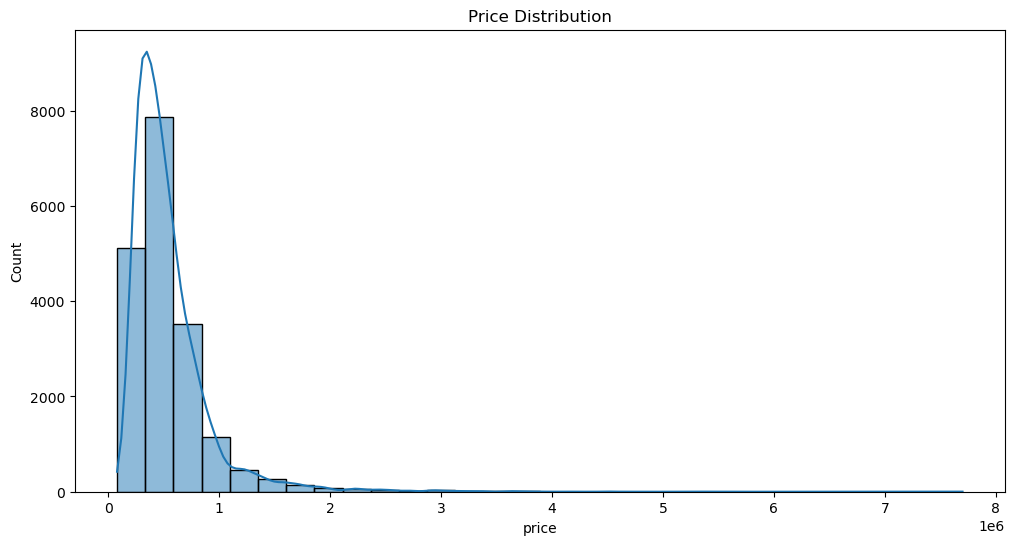

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

This is a  positively skewed distribution is also known as a right-skewed distribution. It suggests that the majority of the prices are concentrated on the lower end, with a few extremely high prices that push the mean (average) higher and, to some extent, the median lower.

Given the columns the best way to explore the data and the check the relationships between the columns and price is by use of a scatter plot

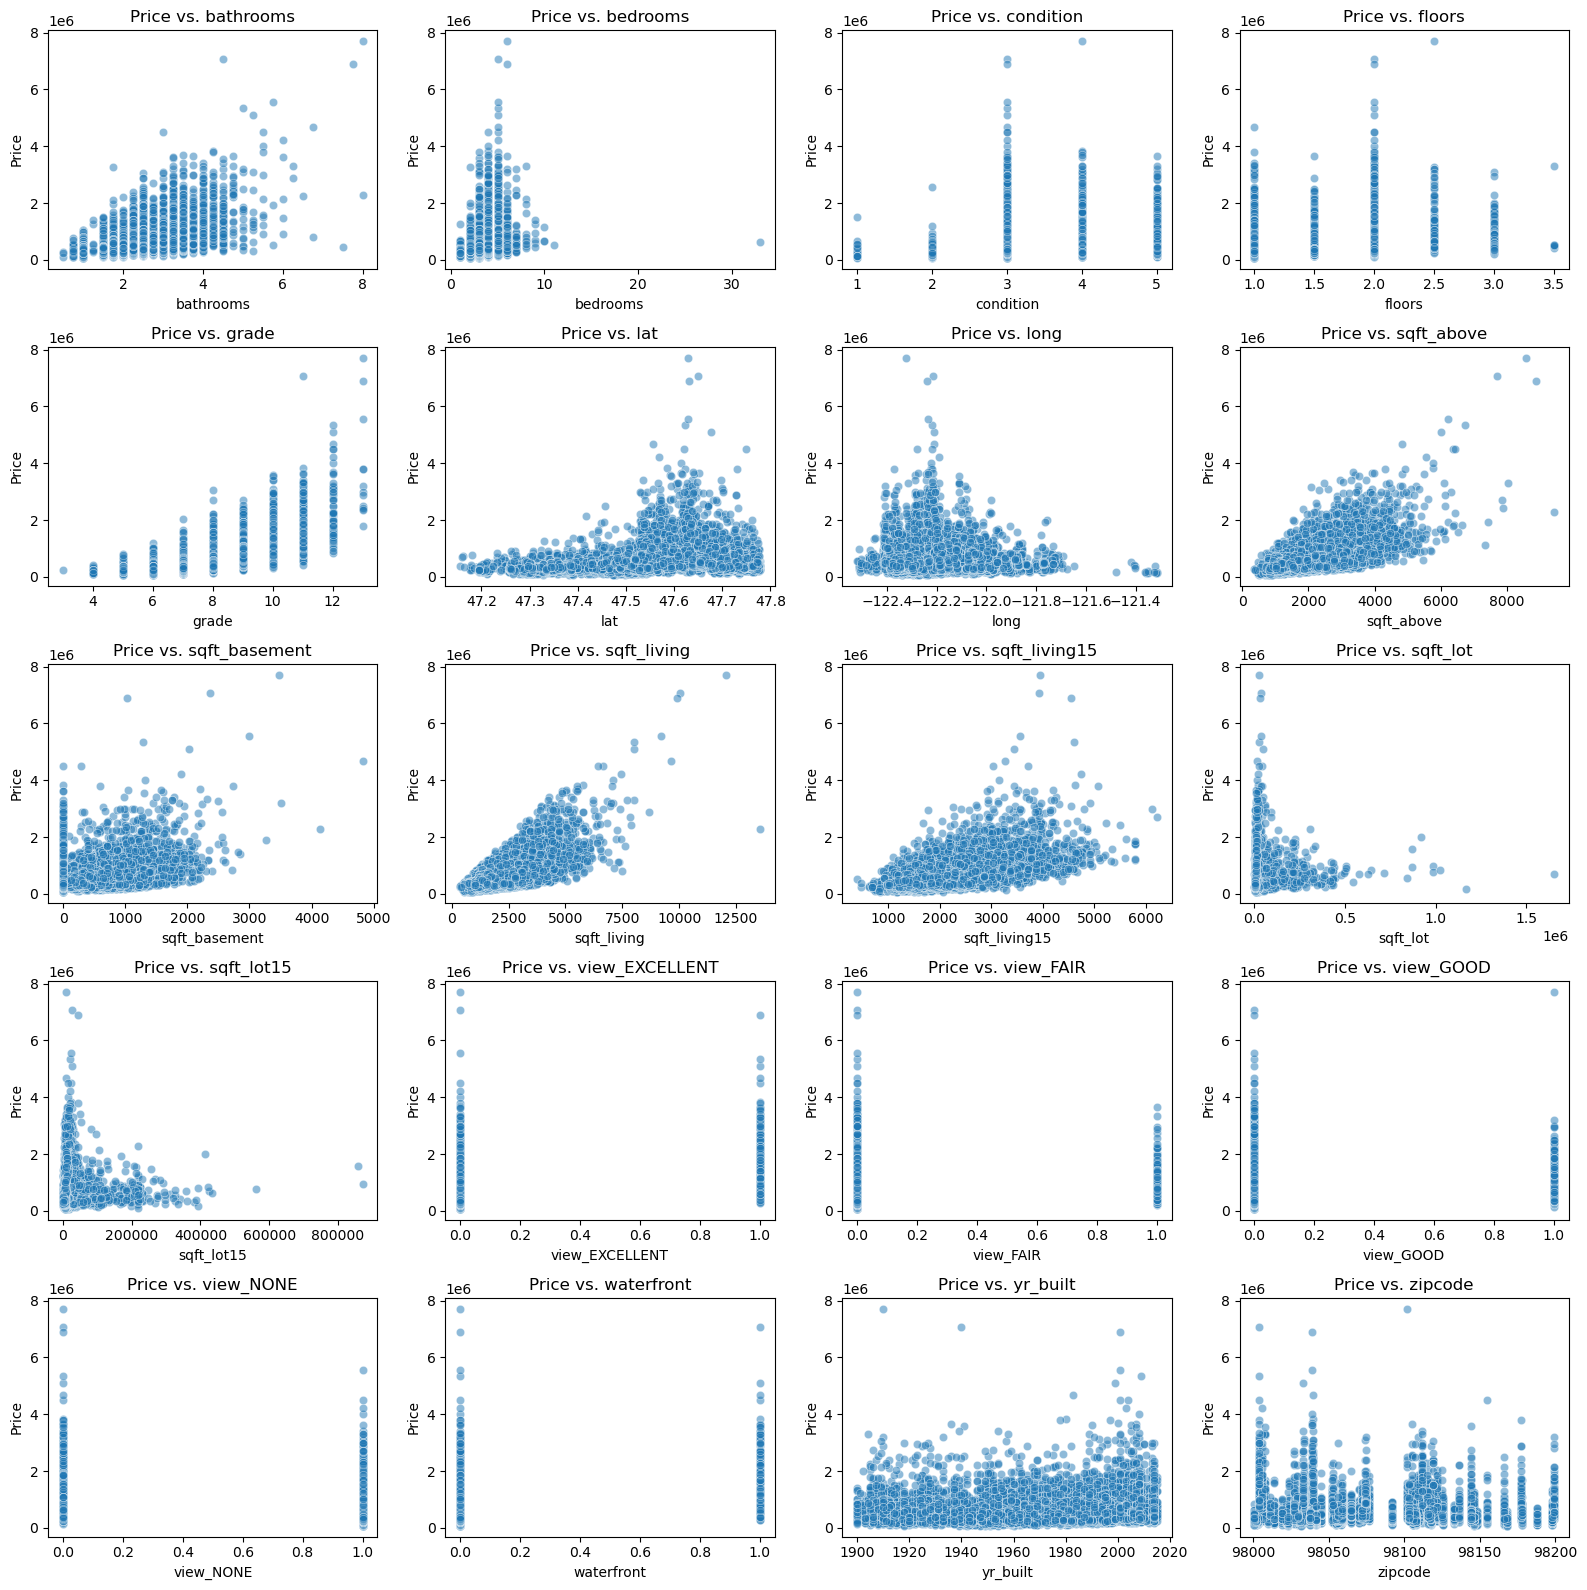

In [16]:
# Select all columns except "id" and "price"
columns = df.columns.difference(["id", "price"])

# Create scatter plots for each selected column
plt.figure(figsize=(16, 16))  # Set the figure size

# Loop through the selected columns and create scatter plots
for i, column in enumerate(columns):
    plt.subplot(5, 4, i + 1)
    sns.scatterplot(data=df, x=column, y="price", alpha=0.5)
    plt.title(f"Price vs. {column}")
    plt.xlabel(column)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()


From the scatter plots above we can clearly see that variables such as `bedrooms`,`floors`,`grade`,`waterfront`,`condition` and `bathrooms` are discrete variables  whereas the rest of the variables are continous variables. 

The scatter plot shows a positive linear relationship almost all the column variables i.e sqft_above,sqft_basement,sqft_living and bathrooms.

### How does the grade of a house influence its pricing ?

The "grade" of a house represents the quality of materials and the level of craftsmanship used in its construction. Grades are assigned on a scale from 1 to 13, where grade 1 to 3 indicates that a house falls below the minimum building standards and is often characterized by basic or inferior construction. 

On the other end of the scale, grade 13 signifies a custom-designed and meticulously built mansion-level property. These high-grade houses feature a substantial amount of the finest quality craftsmanship, including premium cabinet work, intricate wood trim, elegant marble finishes, grand entryways, and other luxurious features.

To better understand the impact of a house's grade on its pricing, we utilize Exploratory Data Analysis (EDA). We employ box plots to visualize how different grade categories influence house prices. This allows us to assess the significance of property grade in property valuation, shedding light on the relationship between the quality of workmanship and the pricing of homes.

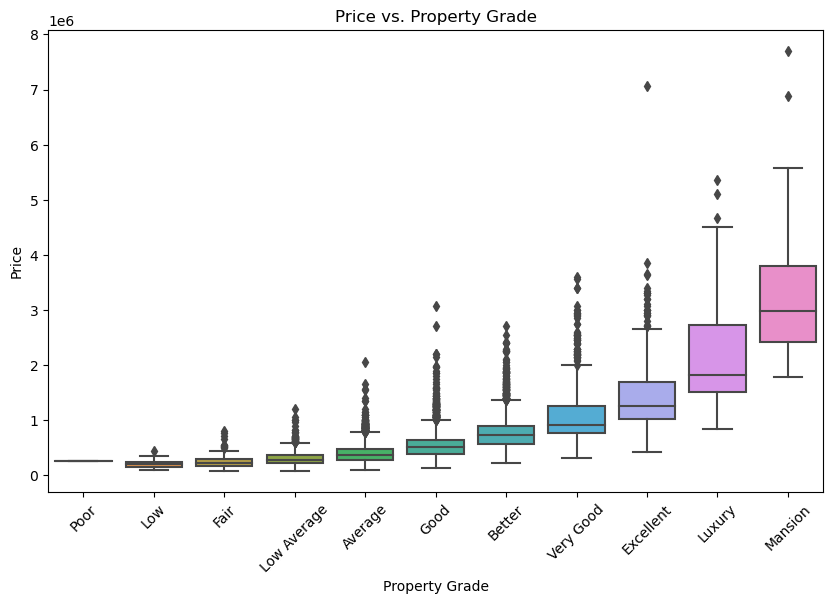

In [17]:
# Create a mapping of grade values to custom labels
grade_labels = {
    3: "Poor",
    4: "Low",
    5: "Fair",
    6: "Low Average",
    7: "Average",
    8: "Good",
    9: "Better",
    10: "Very Good",
    11: "Excellent",
    12: "Luxury",
    13: "Mansion"
}

# Create a list of the custom labels in ascending order
grade_order = sorted(grade_labels.values(), key=lambda x: list(grade_labels.values()).index(x))

# Use the map function to replace numeric values with words
df['grade_words'] = df['grade'].map(grade_labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='grade_words', y='price', data=df, order=grade_order)
plt.title('Price vs. Property Grade')
plt.xlabel('Property Grade')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**Interpreting the Data:**

- **Grade Influence:** The box plot allows you to compare the distribution of house prices for each "grade." A higher "grade" generally indicates a higher level of quality and construction. As you move to higher "grade" categories, you can observe the following:

  - **Median Price:** The median price tends to increase, indicating that houses with higher grades are typically associated with higher median prices.

  - **Price Variability:** The length of the boxes (IQR) represents the variability in prices within each "grade" category. Longer boxes suggest greater variability.In grades such as luxury and mansion there is higher price variability as compare to the lower grades.

  - **Outliers:** The presence of outliers beyond the whiskers indicates extreme values. Outliers may represent exceptional houses with unusually high or low prices within a specific "grade." From the data the ouliers are few and only exist in the higher graded houses

- **Grade Impact:** The box plot demonstrates the impact of the "grade" variable on house prices, showing how prices tend to vary as you move from lower to higher grades.The prices increases with the increase in grades.

<!-- - **Decision Making:** This information can be valuable for both buyers and sellers. Buyers can use it to understand the price distribution within a particular "grade" and make informed decisions. Sellers can use it to set appropriate listing prices based on the grade of their property.

- **Market Insights:** The box plot provides insights into how the housing market values different grades, helping real estate professionals and homeowners better understand pricing dynamics. -->





### Does the number of bathrooms in a house influence its pricing ?
Examine the relationship between the number of bathrooms in a house and its pricing, contributing to the understanding of how functionality affects price.

Here we use a barplot to visualize the relationship between the house price and number of bathrooms since the bathroom data is discrete and limited in number thus making a barplot better than a scatter plot

C:\Users\mwiti\AppData\Local\Temp\ipykernel_17648\429522095.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bathrooms', y='price', data=df, ci=None)


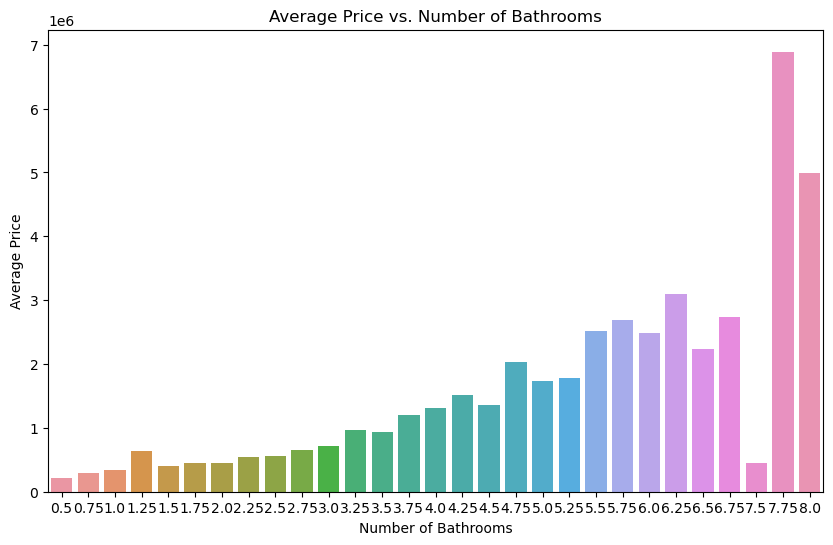

In [18]:
# Create a bar plot to show the average price for each number of bathrooms
plt.figure(figsize=(10, 6))
sns.barplot(x='bathrooms', y='price', data=df, ci=None)
plt.title('Average Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.show()

The plot allows you to observe how the average price varies with the number of bathrooms. You can identify trends and patterns in the data. For example, you can see if there is a noticeable increase  in the average price as the number of bathrooms increases.

It appears that the average price for houses with 2.50 bathrooms is higher than for houses with 1.00 bathroom, and it continues to change as you move to houses with more bathrooms.

In some real estate listings or in this particular case, "2.5 bathrooms"  refers to a house with two full bathrooms and one half bathroom (e.g., a bathroom with only a toilet and sink but no shower or bathtub). It's a common way to describe the bathroom configuration in real estate.

### How does price relate with other variables ?

To show the relationship between house price and the independent variables we use pearson correlation coefficient.

In [19]:
df.corr()["price"].sort_values(ascending=False)

ValueError: could not convert string to float: 'Average'

We can be able to understand the corelation above by use of a corelation heatmap as shown below

In [20]:
correlation_matrix = df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=False, mask=mask)
plt.title('Correlation Heatmap (Lower Triangle)')
plt.show()



ValueError: could not convert string to float: 'Average'

In the analysis, we examined the Pearson correlation coefficients between the "price" variable and various other variables in the dataset. These correlations provide insights into how each variable is related to house prices. Here's a summary of the key findings:

**Strong Positive Correlations with "Price":**

1. `sqft_living` (0.704892): Larger living space typically leads to higher house prices.

2. `grade` (0.667827): Higher-grade ratings are associated with higher prices.

3. `sqft_above` (0.609441): More above-ground square footage generally corresponds to higher prices.

4. `sqft_living15` (0.582869): this is the square footage of interior housing living space for the nearest 15 neighbors.It implies that as the living space for the nearest 15 neighbours increases, the price of the house tends to be higher.

5. `bathrooms` (0.526509): More bathrooms tend to result in higher prices.

6. `view_EXCELLENT` (0.310087): Excellent property views are associated with higher prices.


**Moderate Positive Correlations with "Price":**

7. `bedrooms` (0.309573): Houses with more bedrooms are typically priced higher.

8. `lat` (0.305096): Location at higher latitudes can be associated with higher property values.

9. `waterfront` (0.273248): Houses with a waterfront view generally command higher prices.

10. `floors` (0.258151): More floors in a house tend to lead to higher prices.


**Weaker Positive Correlations with "Price":**

11. `view_GOOD` (0.181053): A good view is positively correlated with house prices.

12. `view_FAIR` (0.091643): Houses with a fair view have a positive but relatively weak correlation with prices.

13. `sqft_lot` (0.086709): Larger lot sizes can be associated with higher house prices.

14. `sqft_lot15` (0.082021):The variable represents square footage of the land lots of the nearest 15 neighbors. As the lot increases, the price tends to be higher.

15. `yr_built` (0.053359): Newer houses are somewhat correlated with higher prices.

16. `condition` (0.035723): The condition of the house has a very weak positive correlation with prices.

17. `long` (0.021343): Location at higher longitudes has a positive but relatively weak correlation with prices.


**Weak Negative Correlations with "Price":**

18. `id` (-0.018544): The ID variable is weakly negatively correlated with prices.

19. `zipcode` (-0.049316): Houses in certain zip codes have a weak negative correlation with prices.


**Strong Negative Correlations with "Price":**

20. `view_NONE` (-0.358042): Houses with no view are strongly negatively correlated with prices.



## Baseline Model

Simple Linear Regression is a fundamental statistical technique used in predictive modeling and statistical analysis, and it serves as a useful starting point for understanding the relationship between a single predictor variable and the target variable,in this case, 'price'.
This model will help us understand how variations in the size of the living space, represented by 'sqft_living,' influence house prices. 

In this model:

Dependent Variable (y_baseline): This represents the target variable we are trying to predict. In this context, it is the price of houses.

Independent Variable (x_baseline): This is the predictor variable that we believe is related to the dependent variable. In this case, it is the square footage of the living space within the houses.

The model's objective is to establish a linear relationship between 'sqft_living' and 'price' by estimating the coefficients (slope and intercept) that best describe how changes in 'sqft_living' correspond to changes in 'price.' The coefficients provide insights into the strength and direction of this relationship.
 

In [21]:
model, model_summary = fit_linear_regression(df, 'price','sqft_living')

rmse, mae = model_metrics(df, 'price', 'sqft_living')

print("RMSE:", rmse)
print("MAE:", mae)
print("Model Summary:")
print(model_summary)

RMSE: 263588.27534037834
MAE: 174964.4042206303
Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.852e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:16:50   Log-Likelihood:            -2.6063e+05
No. Observations:               18749   AIC:                         5.213e+05
Df Residuals:                   18747   BIC:                         5.213e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

### Interpretation for the Baseline Model.

The Baseline Model is a simple linear regression model that predicts 'price' based on a single independent variable, 'sqft_living.'
 
**R-squared:** - R-squared measures the proportion of the variance in the dependent variable (price) that is explained by the independent variable (sqft_living). 
In this case, approximately 49.7% of the variation in price is explained by the variation in square footage of living space (sqft_living).

**Coefficients:** - The model's coefficients provide insight into the relationship between 'sqft_living' and 'price.'
Intercept: -50,820 (rounded) represents the estimated price when the living space size is zero, which is not practically meaningful. 
The coefficient for 'sqft_living' is approximately 284.26, indicating that, on average, for each additional square foot of living space, the price of a property is estimated to increase by $284.26.

**MAE:** - The Mean Absolute Error (MAE) of approximately 175,229.76 quantifies the average magnitude of the prediction errors. The MAE represents the average absolute difference between the predicted prices and the actual prices in the dataset. A lower MAE suggests a more accurate model, while a higher MAE indicates less accuracy. This MAE is high.

**Model Significance:** - The model is highly significant, as indicated by the F-statistic with a very low probability value (Prob (F-statistic): 0.00). This implies that the relationship between living space size and price is statistically significant.

The condition number is large (5.64e+03), which may indicate strong multicollinearity or other numerical problems.

In summary, the Baseline Model is a useful starting point for understanding how the size of living space affects house prices. It explains nearly half, or approximately 49.7%, of the variability in house prices, signifying a significant relationship. The model is statistically robust and fits the data well.

Nevertheless, it's crucial to remain cautious regarding diagnostic tests and potential multicollinearity issues when employing this model for predictive or inferential purposes. While the Baseline Model offers fundamental insights into the impact of living space size on prices, there is room for enhancing predictive accuracy. Addressing potential multicollinearity is a recommended step for improving model performance.

## Multiplelinear Regression

The Multiple Linear Regression Model is a powerful statistical tool used to predict house prices. 

It incorporates various independent variables, such as the number of bedrooms, bathrooms, square footage of living space, lot size, floors, waterfront location, condition, and grade, among others. The model's primary objective is to understand how these features collectively influence house prices.

Multiple Linear Regression Model is an indispensable tool in the realm of real estate, helping us decode the intricate relationship between various features and the prices of homes. It empowers stakeholders to make more informed decisions, whether it's setting a competitive selling price, making wise investment choices, or gaining deeper insights into the housing market's behavior.

In [ ]:
df.drop("grade_words", axis=1,inplace=True)

In [ ]:
# Remove 'id' from the features
X_multi = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE']

# Select the target variable
y_multi = 'price'

multiple_model, multiple_model_summary = fit_linear_regression(df, y_multi, X_multi)

multiple_rmse, multiple_mae = model_metrics(df, y_multi, X_multi)
print("\nMultiple Linear Regression RMSE:", multiple_rmse)
print("Multiple Linear Regression MAE:", multiple_mae)
print("\nMultiple Linear Regression Model Summary:")
print(multiple_model_summary)


### Interpretation of the Multiple Linear Regression Model.

**R-squared:** The model exhibits a high R-squared value of 0.703, indicating that approximately 70.3% of the variation in house prices can be explained by the combination of the included features. This suggests a strong relationship between the predictors and the target variable.

**Adjusted R-squared:** The adjusted R-squared value, closely aligned with the R-squared value at 0.702, helps account for the number of predictors, indicating a robust model fit that avoids overfitting.

**F-statistic:** The high F-statistic of 2309 demonstrates the overall statistical significance of the model, with a very low probability (Prob (F-statistic): 0.00). This underscores the model's strong explanatory power.

**Coefficients:** The coefficients for individual features indicate the magnitude and direction of their impact on house prices. Some features positively influence prices, such as 'bathrooms,' 'sqft_living,' 'floors,' 'waterfront,' 'condition,' and 'grade,' while others, like the number of bedrooms, exert a negative influence.

**Intercept:** The intercept term (const) is 9.114e+06, representing the estimated price when all other predictor variables are zero, although it may not hold practical significance given the nature of the features.

**Mean Absolute Error (MAE):** The MAE is approximately 127,176.67, representing the average absolute difference between predicted and actual house prices. A lower MAE indicates more accurate predictions.

The smallest eigenvalue hints at the potential presence of strong multicollinearity or issues with the design matrix, warranting further investigation.

The Multiple Linear Regression Model demonstrates its strength by effectively explaining a substantial portion of the variance in house prices, as indicated by the high R-squared value. It underscores that numerous features significantly influence house prices, impacting them either positively or negatively.

In practical terms, it's essential to be mindful of the potential existence of multicollinearity within the dataset, necessitating further investigation to ensure the model's reliability. Furthermore, there are opportunities for improving predictive accuracy by reducing the Mean Absolute Error (MAE) through refining the model and optimizing feature selection.

In conclusion, this model proves invaluable for unraveling the intricate relationship between diverse factors and house prices. It provides invaluable insights for making well-informed decisions in real estate analysis and price predictions while pointing toward areas for potential enhancements and refinement.


## Multi Collinearity

## VIF

Calculate the VIF for each independent variable. The VIF measures how much the variance of the estimated regression coefficients is increased due to multicollinearity. Variables with high VIF may need to be addressed.

In [22]:
vif_result = calculate_vif(df, 'price')
print(vif_result)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## New Model

In [23]:
X_final = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
           'floors', 'waterfront', 'condition', 'grade',
           'yr_built', 'zipcode', 'lat', 'long','view_EXCELLENT', 'view_FAIR', 'view_GOOD']

# Define the target variable
y_final = 'price' 

final_model, final_model_summary = fit_linear_regression(df, y_final, X_final)

final_rmse, final_mae = model_metrics(df, y_final, X_final)

print("RMSE:", final_rmse)
print("MAE:", final_mae)
print("Model Summary:")
print(final_model_summary)



RMSE: 203825.43891155993
MAE: 127782.9848963287
Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2903.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:53:11   Log-Likelihood:            -2.5581e+05
No. Observations:               18749   AIC:                         5.117e+05
Df Residuals:                   18733   BIC:                         5.118e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------